In [1]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
class PLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weight_std = nn.Parameter(torch.empty(self.weight.shape))
        nn.init.kaiming_uniform_(self.weight_std, a=math.sqrt(5))

    def forward(self, x):
        return F.linear(
            x, 
            self.weight + self.weight_std * torch.randn(self.weight_std.shape), 
            self.bias
        )

tensor(16.9912, grad_fn=<DivBackward0>)


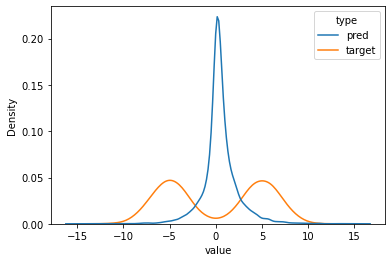

tensor(6.8321, grad_fn=<DivBackward0>)


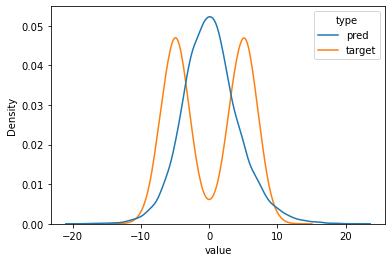

tensor(3.7951, grad_fn=<DivBackward0>)


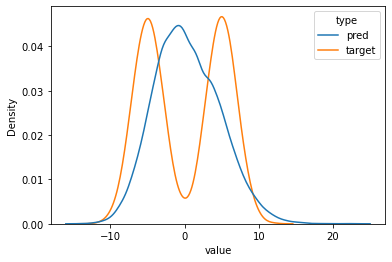

tensor(2.2014, grad_fn=<DivBackward0>)


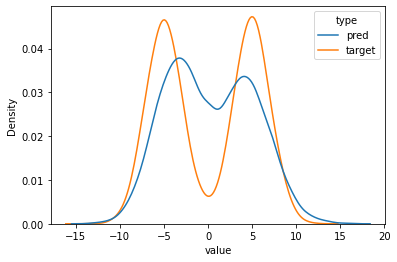

tensor(1.7266, grad_fn=<DivBackward0>)


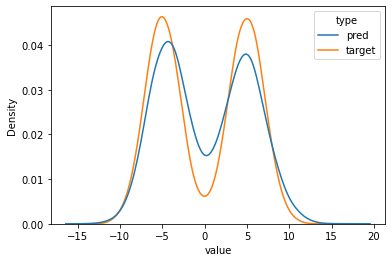

tensor(1.6223, grad_fn=<DivBackward0>)


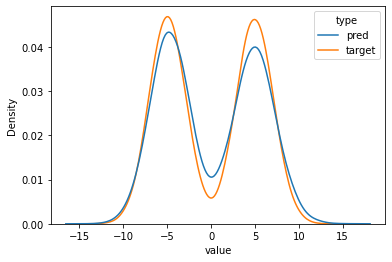

tensor(1.5996, grad_fn=<DivBackward0>)


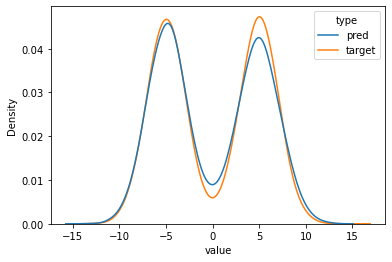

tensor(1.5649, grad_fn=<DivBackward0>)


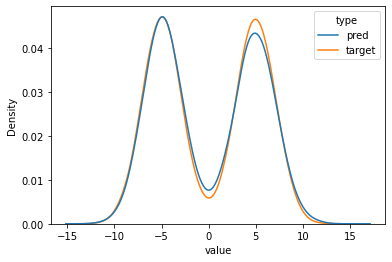

tensor(1.5312, grad_fn=<DivBackward0>)


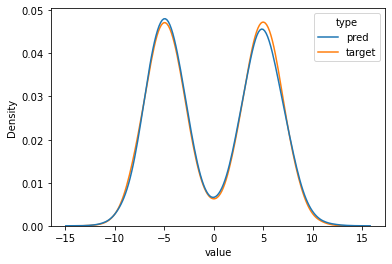

tensor(1.5528, grad_fn=<DivBackward0>)


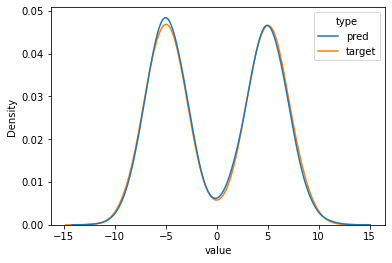

tensor(1.5480, grad_fn=<DivBackward0>)


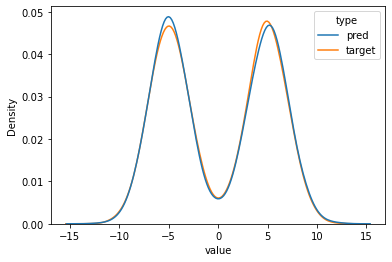

tensor(1.5378, grad_fn=<DivBackward0>)


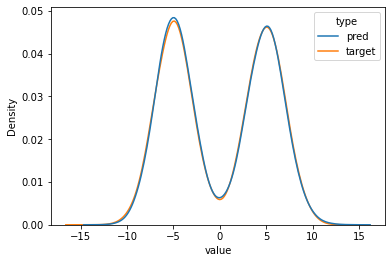

tensor(1.5598, grad_fn=<DivBackward0>)


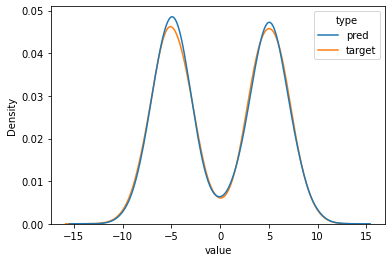

tensor(1.5610, grad_fn=<DivBackward0>)


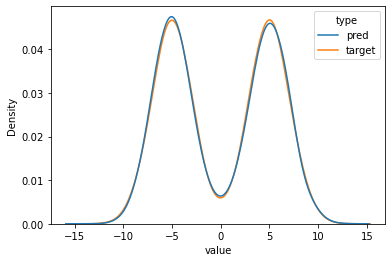

tensor(1.5739, grad_fn=<DivBackward0>)


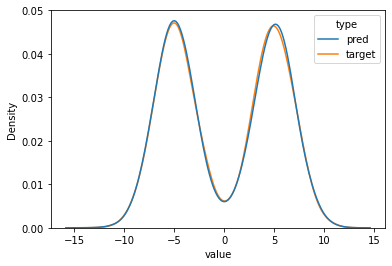

tensor(1.5737, grad_fn=<DivBackward0>)


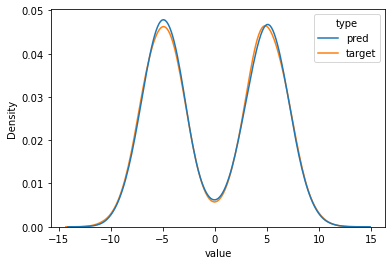

tensor(1.5421, grad_fn=<DivBackward0>)


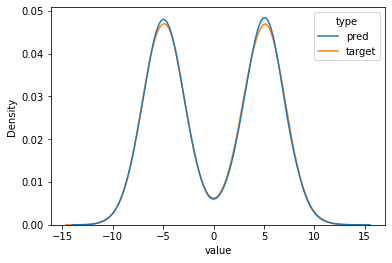

tensor(1.5847, grad_fn=<DivBackward0>)


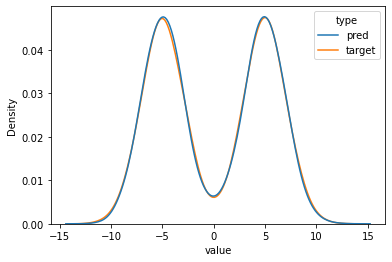

tensor(1.5628, grad_fn=<DivBackward0>)


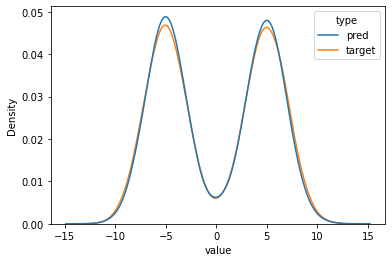

tensor(1.5836, grad_fn=<DivBackward0>)


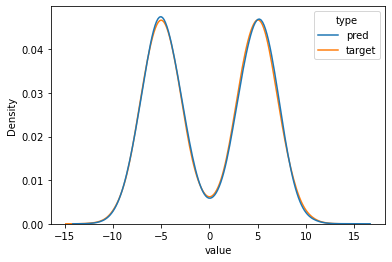

In [11]:
gauss_net = nn.Sequential(
    PLinear(2, 20),
    nn.ReLU(),
    PLinear(20, 20),
    nn.ReLU(),
    PLinear(20, 1)
)

batch_size = 1
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(gauss_net.parameters(), lr=1e-6, momentum=0.9)

running_df = []
loss_avg = 0

for i in range(400000):
    
    mean = 5 if i % 2 == 0 else -5
    std = 2
    targets = torch.randn(batch_size, 1) * std + mean
    
    optimizer.zero_grad()
    
    inputs = torch.ones(batch_size, 2) * (i % 2 == 0)
    
    # Take minimum of N losses
    losses = []
    for j in range(4):
        preds = gauss_net(inputs)
        losses.append(loss_fn(preds, targets))
    losses = torch.stack(losses, dim=-1)
    loss, indices = torch.min(losses, dim=-1)
    
    loss.backward()
    optimizer.step()
    loss_avg += loss
    running_df.append(["pred", preds.item()])
    running_df.append(["target", targets.item()])
    if i % 20000 == 19999:
        print(loss_avg / 20000)
        loss_avg = 0
        sns.kdeplot(data=pd.DataFrame(running_df, columns=["type", "value"]), x="value", hue="type")
        plt.show()
        running_df = []

In [ ]:
print(running_df)